<a href="https://colab.research.google.com/github/daalopezm/Simple_Neural_Network/blob/main/network_made_by_myself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [362]:
#@title Texto de título predeterminado
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

import tensorflow as tf
from matplotlib import animation
from IPython.core.display import display, HTML

from sklearn.datasets import make_circles, make_moons

In [363]:
#X, y = make_circles(n_samples=1000, factor=0.5, noise=0.1)
X, y = make_moons(n_samples=1000, noise=0.1)

(-2.5, 2.5, -2.5, 2.5)

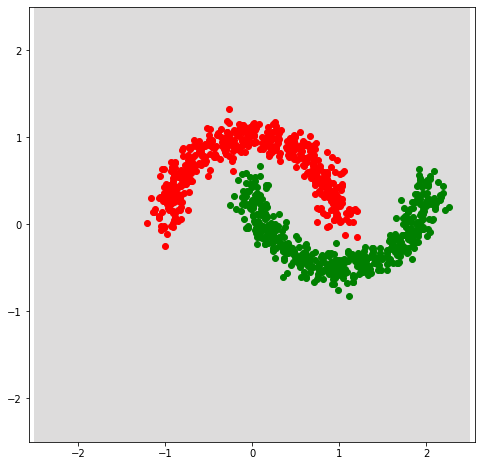

In [372]:
res = 250

# Coordendadas del mapa de predicción.
_x0 = np.linspace(-2.5, 2.5, res)
_x1 = np.linspace(-2.5, 2.5, res)

# Input con cada combo de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)
_pX2 = tf.square(_pX)

#_X1X2 = tf.math.reduce_prod(_pX, 1)
#_pX= tf.concat([_pX,_pX2, tf.reshape(_X1X2,[-1,1])],1)
sin_pX = tf.sin(_pX)
#_pX = tf.concat([_pX,_pX2,sin_pX,tf.reshape(_X1X2,[-1,1])],1)
_pX = tf.concat([_pX,_pX2,sin_pX],1)

# Objeto vacio a 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción.
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1)

plt.scatter(X[y==0,0], X[y==0,1],c='r')
plt.scatter(X[y==1,0], X[y==1,1],c='g')
plt.axis('equal')

In [373]:
# Definimos los puntos de entrada de la red, para la matriz X e Y.

iX=tf.Variable(X, trainable=False)
iX2 = tf.square(iX)
#iX1X2 = tf.math.reduce_prod(iX, 1)
#newiX= tf.concat([iX,iX2,tf.reshape(iX1X2,[-1,1])],1)
siniX = tf.sin(iX)
#newiX= tf.concat([iX,siniX],1)
#iX= tf.concat([iX,iX2,siniX,tf.reshape(iX1X2,[-1,1])],1)
iX= tf.concat([iX,iX2,siniX],1)

iY = y

nn = [iX.get_shape().as_list()[1], 10, 25,1]  # número de neuronas por capa.
W = []
b = []

trainable_variables = []

for layer in range(len(nn)-1):
  W.append(tf.Variable(
      tf.random.normal([nn[layer+1],nn[layer]], dtype='float64'),
      name=f'Weights_{layer}', trainable=True))
  b.append(tf.Variable(
      tf.random.normal([nn[layer+1],1], dtype='float64'), 
      name=f'bias_{layer}', trainable=True))
  trainable_variables.append(W[layer])
  trainable_variables.append(b[layer])



In [374]:
lr = 0.6     # learning rate

# Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.4)

# Evaluación de las predicciones.
loss_object = tf.keras.losses.MeanSquaredError()

#loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=False, label_smoothing=0.0, axis=-1, name='categorical_crossentropy')
#loss_object= tf.keras.losses.MeanAbsoluteError(name='mean_absolute_error')
#loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0.0, axis=-1, name='binary_crossentropy')


In [375]:
#l = [0]*len(nn)
@tf.function
def feedforward(X_input):
  l = tf.nn.sigmoid(tf.add(tf.matmul(W[0],tf.transpose(X_input)), b[0]))
  for layer in range(len(nn)-2):
    if layer < (len(nn)-2):
      l = tf.math.sigmoid(tf.add(tf.matmul(W[layer+1],l), b[layer+1]))
    else:
      l = tf.math.sigmoid(tf.add(tf.matmul(W[layer+1],l), b[layer+1]))
          
  pY=l[0,:]
  return pY

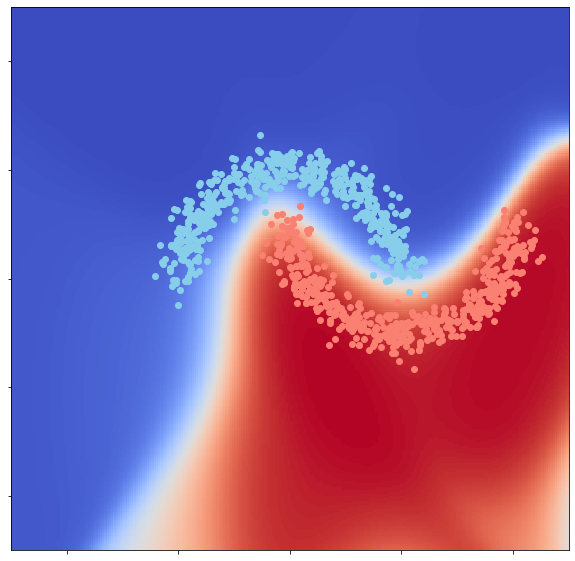

In [378]:
fig = plt.figure(figsize=(10, 10))
_pY = feedforward(_pX)
_pY = tf.transpose(tf.reshape(_pY,[res,res]))
plt.pcolormesh(_x0,_x1, _pY, cmap='coolwarm', animated=True)
plt.scatter(X[y == 0,0], X[y == 0,1], c="skyblue")
plt.scatter(X[y == 1,0], X[y == 1,1], c="salmon")
plt.tick_params(labelbottom=False, labelleft=False)
       

In [377]:
n_steps = 500 # Número de ciclos de entrenamiento.
iPY = [] # Aquí guardaremos la evolución de las predicción, para la animación.

#Let's train for some iterations
for step in range(n_steps):      
  # Vector de predicciones de Y.     
  with tf.GradientTape(persistent=True) as tape:
    pY = feedforward(iX)
    loss = loss_object(y_true=iY,y_pred=pY)
  grads = tape.gradient(target=loss, sources=trainable_variables)
  optimizer.apply_gradients(zip(grads, trainable_variables))

  if step % 10 == 0:       
    # Cálculo del accuracy.    
    acc = np.mean(np.round(pY) == y)
    
    # Impresión de métricas.
    print('- Step', step, '/', n_steps, '- Acc =', acc, '- Loss =', loss.numpy())
    
    # Obtenemos predicciones para cada punto de nuestro mapa de predicción _pX.
    _pY = feedforward(_pX)
    _pY = tf.transpose(tf.reshape(_pY,[res,res]))        
    iPY.append(_pY)
  
  

- Step 0 / 500 - Acc = 0.5 - Loss = 0.3639148473739624
- Step 10 / 500 - Acc = 0.794 - Loss = 0.1652052104473114
- Step 20 / 500 - Acc = 0.819 - Loss = 0.13102905452251434
- Step 30 / 500 - Acc = 0.839 - Loss = 0.11748071014881134
- Step 40 / 500 - Acc = 0.855 - Loss = 0.10786892473697662
- Step 50 / 500 - Acc = 0.869 - Loss = 0.09974672645330429
- Step 60 / 500 - Acc = 0.885 - Loss = 0.092536062002182
- Step 70 / 500 - Acc = 0.896 - Loss = 0.0860680565237999
- Step 80 / 500 - Acc = 0.902 - Loss = 0.08026666939258575
- Step 90 / 500 - Acc = 0.905 - Loss = 0.07506652176380157
- Step 100 / 500 - Acc = 0.914 - Loss = 0.07039067149162292
- Step 110 / 500 - Acc = 0.916 - Loss = 0.06615222990512848
- Step 120 / 500 - Acc = 0.919 - Loss = 0.06226857751607895
- Step 130 / 500 - Acc = 0.923 - Loss = 0.05867398530244827
- Step 140 / 500 - Acc = 0.93 - Loss = 0.05532277375459671
- Step 150 / 500 - Acc = 0.934 - Loss = 0.05218541622161865
- Step 160 / 500 - Acc = 0.939 - Loss = 0.04924270883202553

--- Generando animación ---


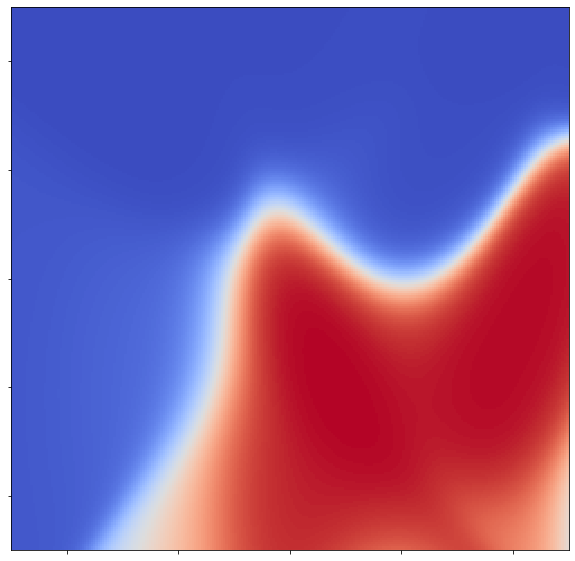

In [379]:
# ----- CÓDIGO ANIMACIÓN ----- #
ims = []
fig = plt.figure(figsize=(10, 10))
print("--- Generando animación ---")

for fr in range(len(iPY)):
  # Visualización de la nube de datos.
  plt.scatter(X[y == 0,0], X[y == 0,1], c="skyblue")
  plt.scatter(X[y == 1,0], X[y == 1,1], c="salmon")

  # plt.title("Resultado Clasificación")
  plt.tick_params(labelbottom=False, labelleft=False)

  im = plt.pcolormesh(_x0,_x1, iPY[fr], cmap='coolwarm', animated=True)
  ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat_delay=2000)

HTML(ani.to_html5_video())